#### 1.2 Import data To DataFrame From Dictionary


In [8]:
## Create a DataFrame from a dictionary 
import pandas as pd
# Pre-defined lists: country [names], Drives_Right [dr], Cars per capital[cpc] 
names = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt'] 
dr = [True, False, False, False, True, True, True] 
cpc = [809, 731, 588, 18, 200, 70, 45]
my_dict = {'country':names, 'drives_right':dr, 'cars_per_cap':cpc} 
cars = pd.DataFrame(my_dict)
print(cars)


         country  drives_right  cars_per_cap
0  United States          True           809
1      Australia         False           731
2          Japan         False           588
3          India         False            18
4         Russia          True           200
5        Morocco          True            70
6          Egypt          True            45


In [9]:
 ## Optional: use zip 
my_dict_zip = dict(zip(['country', 'drives_right', 'cars_per_cap'], [names, dr,cpc])) 
cars_zip = pd.DataFrame(my_dict_zip) 
print(cars_zip)


         country  drives_right  cars_per_cap
0  United States          True           809
1      Australia         False           731
2          Japan         False           588
3          India         False            18
4         Russia          True           200
5        Morocco          True            70
6          Egypt          True            45


In [10]:
 ## Specify the row labels 
row_labels = ['US', 'AUS', 'JAP', 'IN', 'RU', 'MOR', 'EG'] 
cars.index = row_labels 
print(cars)


           country  drives_right  cars_per_cap
US   United States          True           809
AUS      Australia         False           731
JAP          Japan         False           588
IN           India         False            18
RU          Russia          True           200
MOR        Morocco          True            70
EG           Egypt          True            45


#### 1.3 Import data To DataFrame From CSV file


In [12]:
## Create DataFrame from a CSV(Comma-Seperated Values) file
cars = pd.read_csv('cars.csv')
print(cars)
cars = pd.read_csv('cars.csv', index_col = 0)
print(cars)


  Unnamed: 0  cars_per_cap        country  drives_right
0         US           809  United States          True
1        AUS           731      Australia         False
2        JAP           588          Japan         False
3         IN            18          India         False
4         RU           200         Russia          True
5        MOR            70        Morocco          True
6         EG            45          Egypt          True
     cars_per_cap        country  drives_right
US            809  United States          True
AUS           731      Australia         False
JAP           588          Japan         False
IN             18          India         False
RU            200         Russia          True
MOR            70        Morocco          True
EG             45          Egypt          True


#### 1.4 other import keywords: Header, Names, na_value


In [13]:
## header = None
cars = pd.read_csv('cars.csv',header = None)
cars

,0,1,2,3
0,NaN,cars_per_cap,country,drives_right
1,US,809,United States,True
2,AUS,731,Australia,False
3,JAP,588,Japan,False
4,IN,18,India,False
5,RU,200,Russia,True
6,MOR,70,Morocco,True
7,EG,45,Egypt,True


In [15]:
## header = 0
cars = pd.read_csv('cars.csv',header = 0)
cars

,Unnamed: 0,cars_per_cap,country,drives_right
0,US,809,United States,True
1,AUS,731,Australia,False
2,JAP,588,Japan,False
3,IN,18,India,False
4,RU,200,Russia,True
5,MOR,70,Morocco,True
6,EG,45,Egypt,True


In [17]:
col_names = ['A', 'B', 'C'] 
cars = pd.read_csv('cars.csv', names = col_names) 
cars


,A,B,C
NaN,cars_per_cap,country,drives_right
US,809,United States,True
AUS,731,Australia,False
JAP,588,Japan,False
IN,18,India,False
RU,200,Russia,True
MOR,70,Morocco,True
EG,45,Egypt,True


In [18]:
col_names = ['A', 'B', 'C']
cars = pd.read_csv('cars.csv', names = col_names, na_values = {'A':['18','45']}) 
cars


,A,B,C
NaN,cars_per_cap,country,drives_right
US,809,United States,True
AUS,731,Australia,False
JAP,588,Japan,False
IN,NaN,India,False
RU,200,Russia,True
MOR,70,Morocco,True
EG,NaN,Egypt,True


#### 1.5 Import Big Data File


In [22]:
def count_entries(csv_file, c_size, colname):
    """Return a dictionary with counts of occurrences as value for each key."""
    # Initialize an empty dictionary: counts_dict 
    counts_dict = {}
    # Iterate over the file chunk by chunk 
    for chunk in pd.read_csv(csv_file, chunksize=c_size):
        # Iterate over the column in DataFrame 
        for entry in chunk[colname]: 
            if entry in counts_dict.keys(): counts_dict[entry] += 1 
            else: counts_dict[entry] = 1
    # Return counts_dict 
    return counts_dict
# Call count_entrieds(): result_counts
result_counts = count_entries('cars.csv', 10, 'drives_right')
# Print result_counts 
print(result_counts)


{True: 4, False: 3}


#### 1.6 Write into files


In [23]:
out_csv = 'newcsvFile.csv' 
cars.to_csv(out_csv) 
#cars.to_csv(out_csv, sep='\t') 
#cars.to_excel('newexcelfile.xlsx')

#### 1.7 DataFrame Operations: Inde

In [25]:
cars = pd.read_csv('cars.csv', index_col = 0)
print(cars)

## show the type of dataframe
print(type(cars))

## show the shape
print(cars.shape)

## show the columns
print(cars.columns)

for item in cars.columns:
    print(item)
    
## show the index
print(cars.index)
for item in cars.index:
    print(item)

     cars_per_cap        country  drives_right
US            809  United States          True
AUS           731      Australia         False
JAP           588          Japan         False
IN             18          India         False
RU            200         Russia          True
MOR            70        Morocco          True
EG             45          Egypt          True
<class 'pandas.core.frame.DataFrame'>
(7, 3)
Index(['cars_per_cap', 'country', 'drives_right'], dtype='object')
cars_per_cap
country
drives_right
Index(['US', 'AUS', 'JAP', 'IN', 'RU', 'MOR', 'EG'], dtype='object')
US
AUS
JAP
IN
RU
MOR
EG


In [31]:
## Show the column labels

print('Column Labels: ' + ','.join(cars))

## Show the row label and row content
for lab, row in cars.iterrows():
    print("-"* 7 +'label: ', lab)
    print(row)

Column Labels: cars_per_cap,country,drives_right
-------label:  US
cars_per_cap              809
country         United States
drives_right             True
Name: US, dtype: object
-------label:  AUS
cars_per_cap          731
country         Australia
drives_right        False
Name: AUS, dtype: object
-------label:  JAP
cars_per_cap      588
country         Japan
drives_right    False
Name: JAP, dtype: object
-------label:  IN
cars_per_cap       18
country         India
drives_right    False
Name: IN, dtype: object
-------label:  RU
cars_per_cap       200
country         Russia
drives_right      True
Name: RU, dtype: object
-------label:  MOR
cars_per_cap         70
country         Morocco
drives_right       True
Name: MOR, dtype: object
-------label:  EG
cars_per_cap       45
country         Egypt
drives_right     True
Name: EG, dtype: object


#### 1.8 DataFrame Operations: Slicing

In [33]:
cars

,cars_per_cap,country,drives_right
US,809,United States,True
AUS,731,Australia,False
JAP,588,Japan,False
IN,18,India,False
RU,200,Russia,True
MOR,70,Morocco,True
EG,45,Egypt,True


In [34]:
cars.iloc[:3,:]

,cars_per_cap,country,drives_right
US,809,United States,True
AUS,731,Australia,False
JAP,588,Japan,False


In [36]:
cars.loc['US']

cars_per_cap              809
country         United States
drives_right             True
Name: US, dtype: object

In [38]:
cars.loc[:,'cars_per_cap']

US     809
AUS    731
JAP    588
IN      18
RU     200
MOR     70
EG      45
Name: cars_per_cap, dtype: int64

In [39]:
cars.cars_per_cap

US     809
AUS    731
JAP    588
IN      18
RU     200
MOR     70
EG      45
Name: cars_per_cap, dtype: int64

In [42]:
cars['cars_per_cap'].values

array([809, 731, 588,  18, 200,  70,  45], dtype=int64)

#### 1.9 DataFrame Operations: Head, Tail, Info

In [43]:
cars

,cars_per_cap,country,drives_right
US,809,United States,True
AUS,731,Australia,False
JAP,588,Japan,False
IN,18,India,False
RU,200,Russia,True
MOR,70,Morocco,True
EG,45,Egypt,True


In [44]:
cars.head(3)

,cars_per_cap,country,drives_right
US,809,United States,True
AUS,731,Australia,False
JAP,588,Japan,False


In [45]:
cars.tail()

,cars_per_cap,country,drives_right
JAP,588,Japan,False
IN,18,India,False
RU,200,Russia,True
MOR,70,Morocco,True
EG,45,Egypt,True


In [46]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, US to EG
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cars_per_cap  7 non-null      int64 
 1   country       7 non-null      object
 2   drives_right  7 non-null      bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 495.0+ bytes


#### 1.10 DataFrame -> series -> ndarray


In [47]:
cpc = cars['cars_per_cap'] 
print(type(cpc))
print(cpc.head(4))
cpc_value = cpc.values
print(type(cpc_value)) 
print(cpc_value)

<class 'pandas.core.series.Series'>
US     809
AUS    731
JAP    588
IN      18
Name: cars_per_cap, dtype: int64
<class 'numpy.ndarray'>
[809 731 588  18 200  70  45]


#### 1.11 DataFrame: Broadcasting


In [48]:
cars

,cars_per_cap,country,drives_right
US,809,United States,True
AUS,731,Australia,False
JAP,588,Japan,False
IN,18,India,False
RU,200,Russia,True
MOR,70,Morocco,True
EG,45,Egypt,True


In [49]:
import numpy as np 
cars.iloc[:3,0] = np.nan 
cars


,cars_per_cap,country,drives_right
US,NaN,United States,True
AUS,NaN,Australia,False
JAP,NaN,Japan,False
IN,18.0,India,False
RU,200.0,Russia,True
MOR,70.0,Morocco,True
EG,45.0,Egypt,True


In [50]:
cars['NewColumn'] = 0.0 
cars

,cars_per_cap,country,drives_right,NewColumn
US,NaN,United States,True,0.0
AUS,NaN,Australia,False,0.0
JAP,NaN,Japan,False,0.0
IN,18.0,India,False,0.0
RU,200.0,Russia,True,0.0
MOR,70.0,Morocco,True,0.0
EG,45.0,Egypt,True,0.0


In [52]:
## add column in DataFrame

for lab, row in cars.iterrows():
    cars.loc[lab, "COUNTRY"] = row['country'].upper() 
print(cars)

## More efficient way: using .apply 
cars['COUNTRY'] = cars['country'].apply(str.upper) 
print(cars)

     cars_per_cap        country  drives_right  NewColumn        COUNTRY
US            NaN  United States          True        0.0  UNITED STATES
AUS           NaN      Australia         False        0.0      AUSTRALIA
JAP           NaN          Japan         False        0.0          JAPAN
IN           18.0          India         False        0.0          INDIA
RU          200.0         Russia          True        0.0         RUSSIA
MOR          70.0        Morocco          True        0.0        MOROCCO
EG           45.0          Egypt          True        0.0          EGYPT
     cars_per_cap        country  drives_right  NewColumn        COUNTRY
US            NaN  United States          True        0.0  UNITED STATES
AUS           NaN      Australia         False        0.0      AUSTRALIA
JAP           NaN          Japan         False        0.0          JAPAN
IN           18.0          India         False        0.0          INDIA
RU          200.0         Russia          True     

#### 1.12 Series and DataFrame


In [53]:
## series 
print(cars['cars_per_cap']) 
print(type(cars['cars_per_cap']))
## DataFrame 
print(cars[['cars_per_cap']]) 
print(type(cars[['cars_per_cap']]))


US       NaN
AUS      NaN
JAP      NaN
IN      18.0
RU     200.0
MOR     70.0
EG      45.0
Name: cars_per_cap, dtype: float64
<class 'pandas.core.series.Series'>
     cars_per_cap
US            NaN
AUS           NaN
JAP           NaN
IN           18.0
RU          200.0
MOR          70.0
EG           45.0
<class 'pandas.core.frame.DataFrame'>


#### 1.13 Plot data in DataFrame


In [54]:
import matplotlib.pyplot as plt 
cars = pd.read_csv('cars.csv', index_col = 0) 
cars


,cars_per_cap,country,drives_right
US,809,United States,True
AUS,731,Australia,False
JAP,588,Japan,False
IN,18,India,False
RU,200,Russia,True
MOR,70,Morocco,True
EG,45,Egypt,True


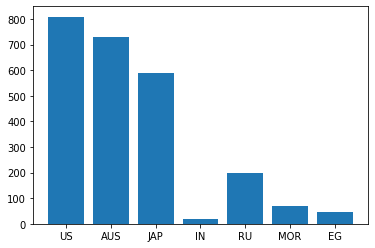

In [55]:
cpc = cars['cars_per_cap'].values 
xlabel = cars.index.values 
ax = plt.bar(xlabel, cpc) 
plt.savefig('cpc.pdf') 
plt.show()


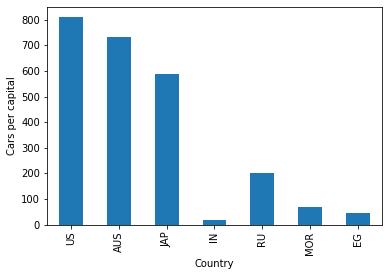

In [56]:
cpc = cars['cars_per_cap'] 
ax = cpc.plot.bar(rot = 90) 
ax.set_xlabel('Country') 
ax.set_ylabel('Cars per capital') 
plt.show()

In [57]:
cars

,cars_per_cap,country,drives_right
US,809,United States,True
AUS,731,Australia,False
JAP,588,Japan,False
IN,18,India,False
RU,200,Russia,True
MOR,70,Morocco,True
EG,45,Egypt,True


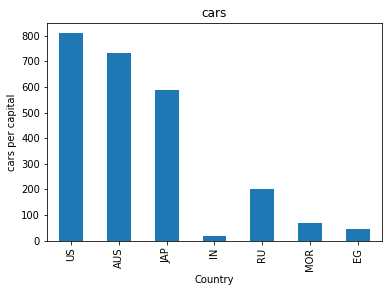

In [58]:
ax = cars['cars_per_cap'].plot.bar() 
ax.set(xlabel='Country', ylabel='cars per capital', title = 'cars') 
plt.show()
